# Try using mean shift algorithm

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import MeanShift
from sklearn.cluster import Birch
from sklearn.cluster import OPTICS

In [2]:
chipotle = pd.read_csv("../Data/chipotle_stores.csv")
chipotle.head(10)

,state,location,address,latitude,longitude
0,Alabama,Auburn,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328
1,Alabama,Birmingham,"300 20th St S Birmingham, AL 35233 US",33.509721,-86.802756
2,Alabama,Birmingham,"3220 Morrow Rd Birmingham, AL 35235 US",33.595581,-86.647437
3,Alabama,Birmingham,"4719 Highway 280 Birmingham, AL 35242 US",33.422582,-86.698279
4,Alabama,Cullman,"1821 Cherokee Ave SW Cullman, AL 35055 US",34.154134,-86.841220
5,Alabama,Hoover,"1759 Montgomery Hwy Hoover, AL 35244 US",33.378958,-86.803802
6,Alabama,Huntsville,"5900 University Dr NW Ste D2 Huntsville, AL 35...",34.742319,-86.665720
7,Alabama,Mobile,"3871 Airport Blvd Mobile, AL 36608 US",30.675338,-88.143754
8,Alabama,Mobile,"7765 Airport Blvd D100 Mobile, AL 36608 US",30.682731,-88.224998
9,Alabama,Montgomery,"2560 Berryhill Rd Ste C Montgomery, AL 36117 US",32.359177,-86.162253


In [3]:
X = chipotle[["latitude", "longitude"]]
X

,latitude,longitude
0,32.606813,-85.487328
1,33.509721,-86.802756
2,33.595581,-86.647437
3,33.422582,-86.698279
4,34.154134,-86.841220
...,...,...
2624,42.565892,-87.921048
2625,43.067723,-88.048222
2626,46.904247,-96.796618
2627,46.855337,-96.861416


In [4]:
clustering = MeanShift(bandwidth=37).fit(X)

In [5]:
clustering.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [6]:
cluster_labels = pd.Series(clustering.labels_, name='cluster')
chipotle_clusters = chipotle.join(cluster_labels.to_frame())
chipotle_clusters

,state,location,address,latitude,longitude,cluster
0,Alabama,Auburn,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328,0
1,Alabama,Birmingham,"300 20th St S Birmingham, AL 35233 US",33.509721,-86.802756,0
2,Alabama,Birmingham,"3220 Morrow Rd Birmingham, AL 35235 US",33.595581,-86.647437,0
3,Alabama,Birmingham,"4719 Highway 280 Birmingham, AL 35242 US",33.422582,-86.698279,0
4,Alabama,Cullman,"1821 Cherokee Ave SW Cullman, AL 35055 US",34.154134,-86.841220,0
...,...,...,...,...,...,...
2624,Wisconsin,Pleasant Prairie,"9370 76th St # B Pleasant Prairie, WI 53158 US",42.565892,-87.921048,0
2625,Wisconsin,Wauwatosa,"2711 N Mayfair Rd Ste A Wauwatosa, WI 53222 US",43.067723,-88.048222,0
2626,North Dakota,Fargo,"1204 19th Ave N Fargo, ND 58102 US",46.904247,-96.796618,0
2627,North Dakota,Fargo,"1680 45th St S Fargo, ND 58103 US",46.855337,-96.861416,0


In [7]:
clustering.cluster_centers_

array([[ 37.51597903, -92.49028662]])

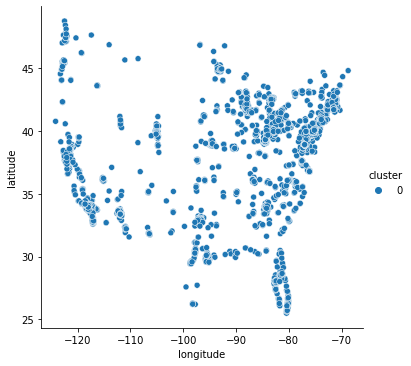

In [8]:
sns.relplot(data=chipotle_clusters, x="longitude", y="latitude", hue="cluster")

In [9]:
colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

In [10]:
for i in range(5, 10):
    clustering = MeanShift(bandwidth=i).fit(X)
    cluster_labels = pd.Series(clustering.labels_, name='cluster')
    chipotle_clusters = chipotle.join(cluster_labels.to_frame())
    #sns.relplot(data=chipotle_clusters, x="longitude", y="latitude", hue="cluster", palette=colors[:len(clustering.cluster_centers_)])

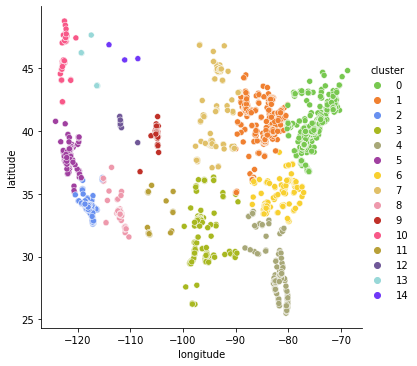

In [11]:
clustering = MeanShift(bandwidth=4).fit(X)
cluster_labels = pd.Series(clustering.labels_, name='cluster')
chipotle_clusters = chipotle.join(cluster_labels.to_frame())
sns.relplot(data=chipotle_clusters, x="longitude", y="latitude", hue="cluster", palette=colors[:len(clustering.cluster_centers_)])

# Birch algo

In [12]:
for i in [0.1, 0.01, 0.001, 1, 10, 100]:
    clustering = Birch(threshold=i).fit(X)
    cluster_labels = pd.Series(clustering.labels_, name='cluster')
    chipotle_clusters = chipotle.join(cluster_labels.to_frame())
    #sns.relplot(data=chipotle_clusters, x="longitude", y="latitude", hue="cluster")

C:\Users\Guillaume\anaconda3\lib\site-packages\sklearn\cluster\_birch.py:646: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (3). Decrease the threshold.
  warnings.warn(


# OPTICS algo

In [13]:
for i in range(1):
    clustering = OPTICS(min_samples=i).fit(X)
    cluster_labels = pd.Series(clustering.labels_, name='cluster')
    chipotle_clusters = chipotle.join(cluster_labels.to_frame())
    #if len(chipotle_clusters["cluster"].unique()) <= 15:
        #sns.relplot(data=chipotle_clusters, x="longitude", y="latitude", hue="cluster", palette=colors[:len(chipotle_clusters["cluster"].unique())])
    #else :
        #sns.relplot(data=chipotle_clusters, x="longitude", y="latitude", hue="cluster")

ValueError: min_samples must be a positive integer or a float between 0 and 1. Got 0